# PyOAE - Geospatial analysis of the potential mitigation of ocean acidification (OA) using ocean alkalinity enhancement (OAE)

**Calculation of the amount of OAE addition of TA needed to restore current ocean conditions to pre-industrial for OA indicator variables in the global oceans**

by Greg Pelletier, 16-Mar-2025

This notebook presents a new method to calculate the amount of Ocean Alkalinity Enhancement (OAE) addition of total alkalinity (TA) that is needed to restore the current untreated condtions (e.g. in year 2010) to the same condition as were present in pre-industrial times (e.g. year 1750), for a selected Ocean Acidification (OA) indicator variable (e.g. TA-DIC, CO3--, Ωara, Ωcal, or pH).   

**Background**

Anthropogenic emissions have significantly increased the atmospheric carbon dioxide (CO2) concentration, from a pre-industrial concentration of around 278 ppm, to over 420 ppm today (Lan et al 2023). Uptake of CO2 by the ocean leads to ocean acidification (OA). OA has already resulted in negative effects on marine ecosystems and organisms, especially marine calcifiers (Bednarsek et al 2023, Cornwall et al 2024). To mitigate the negative effects of global climate change, carbon dioxide removal (CDR) strategies, including marine carbon dioxide removal (mCDR), are considered to be necessary (Lee et al 2023). One important mCDR solution is ocean alkalinity enhancement (OAE), where alkalinity is added to the ocean to increase absorbtion of CO2 from the atmosphere into the ocean. OAE involve adding alkaline substances, such as sodium hydroxide (NaOH) or sodium carbonate (Na2CO3), to the ocean.

While the primary objective of OAE is to increase the uptake of CO2 from atmosphere into the ocean, a secondary benefit could be some amount of mitigation of OA. However, there is an inverse relationship between the OAE efficiency of increasing the uptake of CO2 from the atmosphere and the magntiude of possible OA mitigation.

Analysis of the response of OA indicator variables may be used to evaluate the potential for mitigation of OA by OAE. The difference between TA and DIC, also known as Alk* (Sarmiento & Gruber, 2006), can be used as a surrogate variable to interpret the response of other carbonate system variables such as carbonate ion concentrations (CO3--), pH, aragonite saturation state (Ωara), and calcite saturation state (Ωcal). Each of these variables can be used to interpret the response of calcification of sensitive marine organisms to to ocean acidification (OA) and ocean alkalinity enhancement (OAE) (Xue & Cai, 2020). Ocean acidification has caused a decreases in TA-DIC, CO3--, pH, Ωara, Ωcal since pre-industrial conditions (Sarmiento & Gruber, 2006), with corresponding decrease in calcification rates and increases in dissolution of sensitive organisms (e.g. Bednarsek et al 2025). 

**Problem statement**

The questions we attempt to address in ths notebook are stated as follows: 

- What is the quantity of OAE required to restore the recent historical OA indicators (e.g. TA-DIC, CO3--, pH, Ωara, Ωcal) to pre-industrial conditions?
- How does the quantity of OAE needed to mitigate OA vary spatially?
- How does the quantity of OAE needed to mitigate OA vary depending on which OA indicator variable is evaluated? 

**Methods and data set**

In this notebook we present a root-finding method to solve for the OAE treatment to restore any carbonate system variable (e.g. TA-DIC, CO3--, pH, Ωar, etc.) to pre-industrial conditions. The advantage of the root-finding method is that it can be used to solve for the OAE treatment required for restoration of any carbonate system variable with excellent precision. The disadvantage of the root-finding method is that it takes several hours of CPU time to solve for a water layer over the entire global ocean grid at a spatial resolution of 1$^\circ$ x 1$^\circ$.

Jiang et al (2023) published a global data set of historical and predicted future values of ocean acidification indicator variables for the surface layer of the ocean between the years 1750 to 2100 (https://doi.org/10.1029/2022MS003563). We will use a subset of those data from the years 1750 and 2010 to estimate the amount of total alkalinity (TA) that would need to be added in order to restore the conditions in 2010 to pre-industrial condtions (1750). 

A "root-finding method" is a mathematical technique used to determine the values of a variable (e.g. the OAE treatment ΔTA) that make a given function equal to zero, essentially finding the "root" or "zero" of that function. This is done through an iterative numerical algorithm when analytical solutions are not readily available. In this project we use Brent’s method for the numerical algorithm as implemented in the scipy optimize brentq function.

The general formula for the root-finding method with brentq is as follows, as brentq tries to find a point x where fun(x) = 0 using Brent’s method:

x = scipy.optimize.brentq(fun, x_lwr, x_upr)		

where

-  x = the root of the OAE treatment ΔTA (µmol kg-1) such that the the result of the function ‘fun’ is equal to zero
- fun = the function that calculates the difference between the treated condition at time t (e.g. year 2010 afer hypothetical OAE treatment) compared with the pre-industrial condition (e.g. year 1750) for whichever objective variable is being evaluated (e.g. TA-DIC, CO3--, pH, Ωar).
-  x_lwr = lower bound range of the OAE treatment ΔTA (µmol kg-1).
-  x_upr = upper bound range of the OAE treatment ΔTA (µmol kg-1).

The function ‘fun’ determines the difference between the treated condition at time t (e.g. year 2010 after hypothetical OAE treatment) compared with the pre-industrial condition (e.g. year 1750) for whichever objective variable is being evaluated (e.g. TA-DIC, CO3--, pH, Ωara, Ωcal) as follows:

fun(x) = y_t,trt – y_PI	

where

-  y_t,trt = the value objective variable at time t (e.g. 2010) after hypothetical OAE treatment
-  y_PI = the value of the objective variable in pre-industrial conditions (e.g. 1750)
-  y = the carbonate system variable that is used as the objective variable (e.g. TA-DIC, CO3--, pH, Ωara, Ωcal).

The function ‘fun’ performs the following calculations using a carbonate system calculator (e,g, PyCO2SYS) and the following equations:

-	Calculate ΔDICtrt and ΔDICcdr from trial values of x = dTA = ΔTAtrt using the following equations:

    - ΔTAtrt = dTA = x = the trial value of the hypothetical OAE treatment addition of total alkalinity (umol/kg)
    - ΔDICtrt = direct chemical addition of DIC due to the trial value of the OAE treatment addition (umol/kg)
    - ΔDICcdr = indirect CDR addition of DIC in response to the OAE treatment addition (umol/kg)
    - TAt,ctl = control TA at time t before OAE treatment (umol/kg)
    - TAt,trt = TAt,ctl + dTA = treatment TA at time t after OAE treatment (umol/kg)
    - DICt,ctl = control DIC at time t before OAE treatment (umol/kg)
    - DICt,trt = treatment DIC at time t after OAE treatment (umol/kg)
    - pCO2t,ctl = control pCO2 at time t before OAE treatment (uatm)

    - DICeq = CO2SYS calculation of DIC at equilibrium when input TA = TAt,trt and input pCO2 = pCO2t,ctl
    - CDRpot = DICeq - DICt,ctl = hypothetical maximum potential CDR (umol/kg)
    - etamax = CDRpot / dTA = hypothetical maximum OAE efficiency, typically in the range of 0.7-0.9 (Yankovsky et al 2024) (dimensionless)
    - eta(t) = CDR / dTA = realized OAE efficiency at  time t due to the realized CDR (dimensionless)
    - CDReff = eta(t) / etamax = realized CDR efficiency, typically in the range of 0.65-0.95 (Zhou et al 2024, Wang et al 2023) (dimensionless)  

    - If NaOH is used for OAE, then the following equations apply:
        - ΔDICtrt = 0
        - ΔDICcdr = CDReff * etamax * dTA
    - If Na2CO3 is used for OAE, then the following equations apply:
        - ΔDICtrt = 0.5 * dTA
        - ΔDICcdr = cdreff * (etamax - 0.5) * dTA

-	Calculate the DICt,trt and TAt,trt at time t (2010) after OAE treatment as follows:
    - TAt,trt = TAt,ctl + dTA
    - DICt,trt = DICt,ctl + ΔDICtrt + ΔDICcdr
-	Calculate yt,trt corresponding to DICt,trt and TAt,trt
-	Calculate yPI corresponding to DICPI and TAPI
-	Calculate fun(x) = yt,trt – yPI


**References**

- Bednaršek, N., B. R. Carter, R. M. McCabe, R. A. Feely, E. Howard, F. P. Chavez, M. Elliott, J. L. Fisher, J. Jahncke, Z. Siegrist, Pelagic calcifiers face increased mortality and habitat loss with warming and ocean acidification. Ecol. Appl. 32, e2674 (2022).
- Bednaršek, N., H. van de Mortel, G. Pelletier, M. García-Reyes, R. A. Feely, A. G. Dickson, Assessment framework to predict sensitivity of marine calcifiers to ocean alkalinity enhancement – identification of biological thresholds and importance of precautionary principle. Biogeosciences 22, 473–498 (2025).
- Cornwall, C.E., S. Comeau, B. P. Harvey, Are physiological and ecosystem-level tipping points caused by ocean acidification? A critical evaluation. Earth Syst. Dyn. 15, 671–687 (2024).
- Jiang, L., J. Dunne, B. R. Carter, J. F. Tjiputra, J. Terhaar, J. D. Sharp, A. Olsen, S. Alin, D. C. E. Bakker, R. A. Feely, J. Gattuso, P. Hogan, T. Ilyina, N. Lange, S. K. Lauvset, E. R. Lewis, T. Lovato, J. Palmieri, Y. Santana‐Falcón, J. Schwinger, R. Séférian, G. Strand, N. Swart, T. Tanhua, H. Tsujino, R. Wanninkhof, M. Watanabe, A. Yamamoto, T. Ziehn, Global Surface Ocean Acidification Indicators From 1750 to 2100. J. Adv. Model. Earth Syst. 15, e2022MS003563 (2023).
- Lan, X., P. Tans, K. Thoning, NOAA Global Monitoring Laboratory, Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements., NOAA GML (2023); https://doi.org/10.15138/9N0H-ZH07.
- Lee et al 2023, “IPCC, 2023: Climate Change 2023: Synthesis Report. Contribution of Working Groups I, II and III to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, H. Lee and J. Romero (eds.)]. IPCC, Geneva, Switzerland.” (Intergovernmental Panel on Climate Change (IPCC), 2023); https://doi.org/10.59327/IPCC/AR6-9789291691647.
- Sarmiento. J.L., N. Gruber, Ocean Biogeochemical Dynamics (Princeton University Press, 2006; https://www.jstor.org/stable/j.ctt3fgxqx).
- Wang, H., D. J. Pilcher, K. A. Kearney, J. N. Cross, O. M. Shugart, M. D. Eisaman, B. R. Carter, Simulated Impact of Ocean Alkalinity Enhancement on Atmospheric CO2 Removal in the Bering Sea. Earths Future 11, e2022EF002816 (2023).
- Xue, L., W.-J. Cai, Total alkalinity minus dissolved inorganic carbon as a proxy for deciphering ocean acidification mechanisms. Mar. Chem. 222, 103791 (2020).
- Yankovsky, E., M. Zhou, M. Tyka, S. Bachman, D. Ho, A. Karspeck, M. Long, Impulse response functions as a framework for quantifying ocean-based carbon dioxide removal. EGUsphere, 1–26 (2024).
- Zhou, M., M. D. Tyka, D. T. Ho, E. Yankovsky, S. Bachman, T. Nicholas, A. R. Karspeck, M. C. Long, Mapping the global variation in the efficiency of ocean alkalinity enhancement for carbon dioxide removal. Nat. Clim. Change, 1–7 (2024)



# Results

In the following sections we will calculate examples of the amount of ΔTA needed to restore TA-DIC, CO3--, Ωara, and pH to pre-industrial conditions. Note that a similar amount of ΔTA is needed to restore TA-DIC, CO3--, and Ωara because of the close correlation between these variables. Note that more ΔTA is needed to restore pH because of the effect of anthropogenic increase in temperature on anthropogenic decrease in pH in addition to the effect of anthropogenic increase in atmospheric CO2.

In our examples below we will assume that NaOH is used for the addition of TA, and we will assume that the CDR efficiency is 80%.

We will use the python multiprocessing package to do the calculations using parallel computing. This is because the calculations are very intensive and require several hours of processing for the entire global grid. Parallel processing reduces the run times signficantly.

First we will import the python packages we need to use and read the netcdf file data we will use in this example.

The netcdf file "Jiang_data_for_PyOAE.nc" is available to download from this github repository. This data set provides the decadal average global carbonate system variable values in the year 2010 and in the year 1750. The original source of these data is from a paper by Jiang et al (2023) (https://doi.org/10.1029/2022MS003563)

**Uncomment one of the following lines to install or upgrade the PyOAE package if it is not already installed**

In [ ]:
# !pip install git+https://github.com/gjpelletier/PyOAE.git
# !pip install git+https://github.com/gjpelletier/PyOAE.git --upgrade

**Import packages**

In [1]:
# import the packages that are needed
from PyOAE import f_dTA
import scipy.optimize as opt
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
import multiprocessing
import scipy.io

**Read the dataset from the Jiang_data_for_PyOAE.nc file**

In [3]:
# read the global arrays of surface ocean data and assign to a dictionary
# ds = xr.open_dataset("jiang_data_for_jupyter_v12.nc", chunks={"lon":60})
ds = xr.open_dataset("Jiang_data_for_PyOAE.nc", chunks={"x":60})
# copy the dask 2d arrays in ds values to numpy 2d arrays in ds_dict
ds_dict = {var: ds[var].values for var in ds.data_vars}
# Reshape all 2D arrays to 1D
ds_dict_1d = {key: arr.flatten() for key, arr in ds_dict.items()}
ds

<xarray.Dataset> Size: 3MB
Dimensions:     (x: 360, y: 180)
Coordinates:
  * x           (x) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * y           (y) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    talk_1750   (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    dic_1750    (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    temp_1750   (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    sal_1750    (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    talk_2010   (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    dic_2010    (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    temp_2010   (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    sal_2010    (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    po4         (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    sio3        (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    dist2coast  (y, x) float32 259kB dask.array<chunksize=(180, 60), meta=np.ndarray>
    LME         (y, x) float64 518kB dask.array<chunksize=(180, 60), meta=np.ndarray>
Attributes:
    title:    Average carbonate system variables of the surface ocean in the ...
    source:   TA, DIC, temperature and salinity from Jiang et al 2023, sio3 a...
    author:   Greg Pelletier 15-Mar-2025

**Next we will define the function that will be used to find the root value in each grid cell**

In [4]:
# define the function to find the root in each grid cell i
def find_root(i):
    chem_pi = np.full(7, np.nan)
    chem_pi[0] = ds_dict_1d["talk_1750"][i]    # TA in 1750 (umol/kg)
    chem_pi[1] = ds_dict_1d["dic_1750"][i]     # DIC in 1750 (umol/kg)
    chem_pi[2] = ds_dict_1d["sio3"][i]         # SiO3 in 1750 (umol/kg)
    chem_pi[3] = ds_dict_1d["po4"][i]          # PO4 in 1750 (umol/kg)
    chem_pi[4] = ds_dict_1d["temp_1750"][i]    # Temperature in 1750 (degC)
    chem_pi[5] = ds_dict_1d["sal_1750"][i]     # Salinity in 1750 (psu)        
    chem_pi[6] = 0
    chem_ctl = np.full(7, np.nan)
    chem_ctl[0] = ds_dict_1d["talk_2010"][i]   # TA in 2010 (umol/kg)
    chem_ctl[1] = ds_dict_1d["dic_2010"][i]    # DIC in 2010 (umol/kg)
    chem_ctl[2] = ds_dict_1d["sio3"][i]        # SiO3 in 2010 (umol/kg)
    chem_ctl[3] = ds_dict_1d["po4"][i]         # PO4 in 2010 (umol/kg)
    chem_ctl[4] = ds_dict_1d["temp_2010"][i]   # Temperature in 2010 (degC)
    chem_ctl[5] = ds_dict_1d["sal_2010"][i]    # Salinity in 2010 (psu) 
    chem_ctl[6] = 0
    kwargs = {
    'chem_pi': chem_pi,
    'chem_ctl': chem_ctl,
    'oae_type': oae_type,
    'obj_var': obj_var,
    'cdreff': cdreff
    }
    nnn_pi = np.count_nonzero(~np.isnan(chem_pi))  # number of non-nan
    nnn_ctl = np.count_nonzero(~np.isnan(chem_ctl))  # number of non-nan
    if nnn_pi==7 and nnn_ctl==7:
        f_x = lambda x: f_dTA(x, **kwargs)
        root = opt.brentq(f_x, x_lwr, x_upr)
        return np.array([i,root])

**Next we will define a matlab-style tic toc timer to measure how long the computations take**

In [5]:
# matlab-style tic toc timer
def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )
    return

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

# ΔTA needed to restore TA-DIC to pre-industrial conditions

Next we will calculate the amount of ΔTA needed to restore TA-DIC in 2010 to pre-industrial conditions. We will assume that NaOH is used to increase the TA, and we will assume that the CDR efficiency is 80%.

We will use a multiprocessing loop to calculate the results in all of the grid cells. This takes about 2.4 hours using 6 CPU cores. Note that these calculations would take many times longer of we were not using multiprocessing to parallelize the computations between multiple CPUs. If you are using a Windows laptop, we recommend setting the value of ncpu below equal to the number of performance cores in your laptop for optimum use of your computer resources.

In [4]:
# specify the options to use for this example
obj_var = 'alkstar'   # objective variable: 'alkstar', 'co3', phtot', 'omara', 'omcal'
oae_type = 'NaOH'     # chemical used for OAE: 'NaOH' or 'Na2CO3'
cdreff = 0.8          # CDR efficiency between 0-1 (e.g. 0.8 = 80%)
x_lwr = 0             # lower bound of possible dTA values (umol/kg)
x_upr = 500           # upper bound of possible dTA values (umol/kg)

# initialize 1d array of the dTA_root values to restore the objective variable to pre-industrial
ds_dict_1d["dTA_root_alkstar"] = np.full((180*360), np.nan) # init out array 

# parallel processing loop through all grid cells (takes about 2.4 hours using 6 CPUs)
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_root, range(ds_dict_1d["dTA_root_alkstar"].shape[0]))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result[0])
            root = result[1]
            ds_dict_1d["dTA_root_alkstar"][i] = root
            # print(i, root) 
toc()
# reshape 1d dTA_root to 2d (180, 360)
ds_dict["dTA_root_alkstar"] = ds_dict_1d["dTA_root_alkstar"].reshape(ds_dict["talk_1750"].shape)

Elapsed time: 8687.132699 seconds.



**Next we will make a map showing the results**

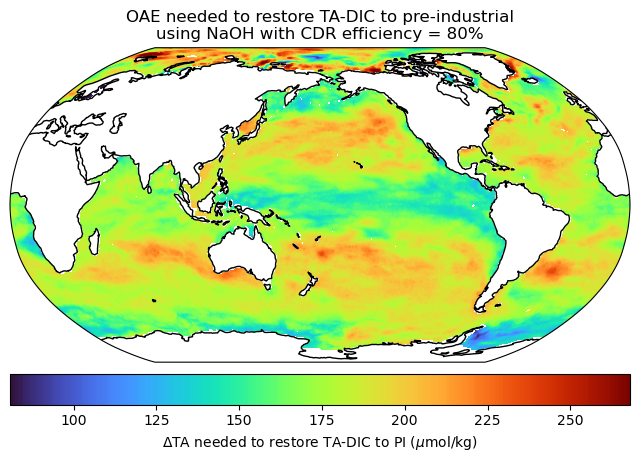

In [47]:
# Robinson map of the results
import cartopy.crs as ccrs
plt.figure(figsize=(8, 5))
X = ds["x"].values
Y = ds["y"].values
Z = ds_dict["dTA_root_alkstar"].copy()
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('OAE needed to restore TA-DIC to pre-industrial\nusing NaOH with CDR efficiency = 80%')
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label=r'$\Delta$TA needed to restore TA-DIC to PI ($\mu$mol/kg)',
            ticks=[0,25,50,75,100,125,150,175,200,225,250]);
plt.savefig('OAE_needed_to_restore_alkstar_using_NaOH_at_CDReff80.png', format='png', dpi=300)
plt.show()

# ΔTA needed to restore CO3-- to pre-industrial conditions

Next we will calculate the amount of ΔTA needed to restore the carbonate ion concentration (CO3--) in 2010 to pre-industrial conditions. We will assume that NaOH is used to increase the TA, and we will assume that the CDR efficiency is 80%.

Note that the computations in the next step take about 6.5 hours using 6 CPUs. The reason it takes longer compared with the previous analysis is that few computations are needed when the objective variable is TA-DIC, and more computations are needed when the obective variable is CO3--, Ωara, or pH.

In [9]:
# specify the options to use for this example
obj_var = 'co3'       # objective variable: 'alkstar', 'co3', phtot', 'omara', 'omcal'
oae_type = 'NaOH'     # chemical used for OAE: 'NaOH' or 'Na2CO3'
cdreff = 0.8          # CDR efficiency between 0-1 (e.g. 0.8 = 80%)
x_lwr = 0             # lower bound of possible dTA values (umol/kg)
x_upr = 500           # upper bound of possible dTA values (umol/kg)

# initialize 1d array of the dTA_root values to restore the objective variable to pre-industrial
ds_dict_1d["dTA_root_co3"] = np.full((180*360), np.nan) # init out array 

# parallel processing loop through all grid cells (takes about 6.5 hours using 6 CPUs)
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_root, range(ds_dict_1d["dTA_root_co3"].shape[0]))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result[0])
            root = result[1]
            ds_dict_1d["dTA_root_co3"][i] = root
            # print(i, root) 
toc()
# reshape 1d dTA_root to 2d (180, 360)
ds_dict["dTA_root_co3"] = ds_dict_1d["dTA_root_co3"].reshape(ds_dict["talk_1750"].shape)

Elapsed time: 23740.670862 seconds.



**Next we will make a map showing the results**

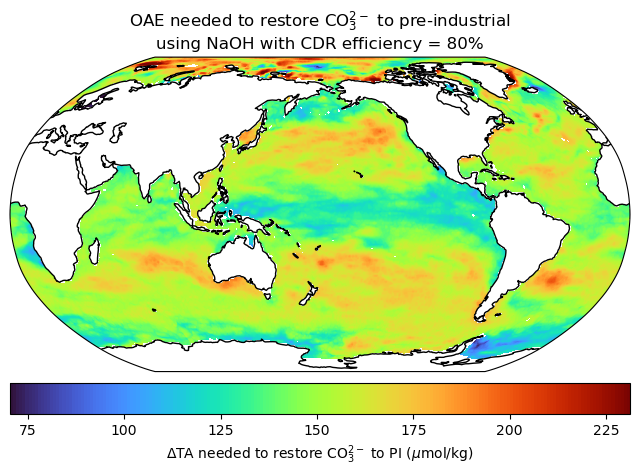

In [48]:
# Robinson map of the results
import cartopy.crs as ccrs
plt.figure(figsize=(8, 5))
X = ds["x"].values
Y = ds["y"].values
Z = ds_dict["dTA_root_co3"].copy()
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('OAE needed to restore CO$_3^{2-}$ to pre-industrial\nusing NaOH with CDR efficiency = 80%')
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label=r'$\Delta$TA needed to restore CO$_3^{2-}$ to PI ($\mu$mol/kg)',
            ticks=[0,25,50,75,100,125,150,175,200,225,250]);
plt.savefig('OAE_needed_to_restore_CO3_using_NaOH_at_CDReff80.png', format='png', dpi=300)
plt.show()

# ΔTA needed to restore Ωara to pre-industrial conditions

Next we will calculate the amount of ΔTA needed to restore the aragonite saturation state (Ωara) in 2010 to pre-industrial conditions. We will assume that NaOH is used to increase the TA, and we will assume that the CDR efficiency is 80%.

Note that the computations in the next step take about 6.5 hours using 6 CPUs. The reason it takes longer compared with the previous analysis is that few computations are needed when the objective variable is TA-DIC, and more computations are needed when the obective variable is CO3--, Ωara, or pH.

In [16]:
# specify the options to use for this example
obj_var = 'omara'       # objective variable: 'alkstar', 'co3', phtot', 'omara', 'omcal'
oae_type = 'NaOH'     # chemical used for OAE: 'NaOH' or 'Na2CO3'
cdreff = 0.8          # CDR efficiency between 0-1 (e.g. 0.8 = 80%)
x_lwr = 0             # lower bound of possible dTA values (umol/kg)
x_upr = 500           # upper bound of possible dTA values (umol/kg)

# initialize 1d array of the dTA_root values to restore the objective variable to pre-industrial
ds_dict_1d["dTA_root_omara"] = np.full((180*360), np.nan) # init out array 

# parallel processing loop through all grid cells (takes about 6.5 hours using 6 CPUs)
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_root, range(ds_dict_1d["dTA_root_omara"].shape[0]))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result[0])
            root = result[1]
            ds_dict_1d["dTA_root_omara"][i] = root
            # print(i, root) 
toc()
# reshape 1d dTA_root to 2d (180, 360)
ds_dict["dTA_root_omara"] = ds_dict_1d["dTA_root_omara"].reshape(ds_dict["talk_1750"].shape)

Elapsed time: 24423.811344 seconds.



**Next we will make a map showing the results**

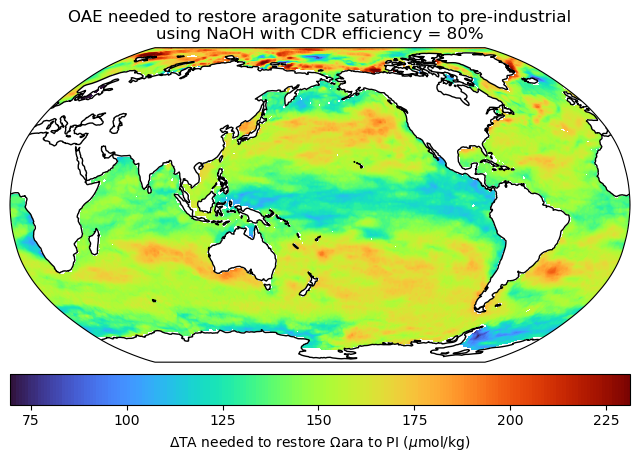

In [49]:
# Robinson map of the results
import cartopy.crs as ccrs
plt.figure(figsize=(8, 5))
X = ds["x"].values
Y = ds["y"].values
Z = ds_dict["dTA_root_omara"].copy()
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('OAE needed to restore aragonite saturation to pre-industrial\nusing NaOH with CDR efficiency = 80%')
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label=r'$\Delta$TA needed to restore $\Omega$ara to PI ($\mu$mol/kg)',
            ticks=[0,25,50,75,100,125,150,175,200,225,250]);
plt.savefig('OAE_needed_to_restore_omara_using_NaOH_at_CDReff80.png', format='png', dpi=300)
plt.show()

# ΔTA needed to restore pH to pre-industrial conditions

Next we will calculate the amount of ΔTA needed to restore the pH (total) in 2010 to pre-industrial conditions. We will assume that NaOH is used to increase the TA, and we will assume that the CDR efficiency is 80%.

Note that the computations in the next step take about 6.5 hours using 6 CPUs. The reason it takes longer compared with the previous analysis is that few computations are needed when the objective variable is TA-DIC, and more computations are needed when the obective variable is CO3--, Ωara, or pH.

Note also that a larger amount of ΔTA is needed to restore pH to pre-industrial conditions compared with restoring other carbonate system variables. This is because of the effect of anthropogenic increase in temperature on anthropogenic decrease in pH in addition to the effect of anthropogenic increase in atmospheric CO2.

In [20]:
# specify the options to use for this example
obj_var = 'phtot'       # objective variable: 'alkstar', 'co3', phtot', 'omara', 'omcal'
oae_type = 'NaOH'     # chemical used for OAE: 'NaOH' or 'Na2CO3'
cdreff = 0.8          # CDR efficiency between 0-1 (e.g. 0.8 = 80%)
x_lwr = 0             # lower bound of possible dTA values (umol/kg)
x_upr = 500           # upper bound of possible dTA values (umol/kg)

# initialize 1d array of the dTA_root values to restore the objective variable to pre-industrial
ds_dict_1d["dTA_root_phtot"] = np.full((180*360), np.nan) # init out array 

# parallel processing loop through all grid cells (takes about 6.5 hours using 6 CPUs)
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_root, range(ds_dict_1d["dTA_root_phtot"].shape[0]))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result[0])
            root = result[1]
            ds_dict_1d["dTA_root_phtot"][i] = root
            # print(i, root) 
toc()
# reshape 1d dTA_root to 2d (180, 360)
ds_dict["dTA_root_phtot"] = ds_dict_1d["dTA_root_phtot"].reshape(ds_dict["talk_1750"].shape)

Elapsed time: 21705.571139 seconds.



**Next we will make a map showing the results**

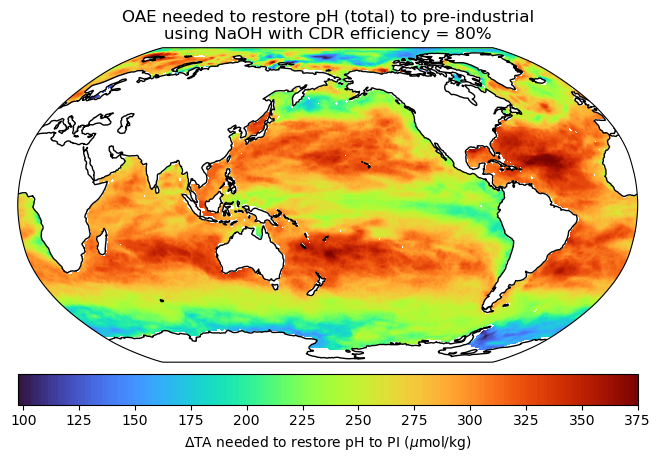

In [50]:
# Robinson map of the results
import cartopy.crs as ccrs
plt.figure(figsize=(8, 5))
X = ds["x"].values
Y = ds["y"].values
Z = ds_dict["dTA_root_phtot"].copy()
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('OAE needed to restore pH (total) to pre-industrial\nusing NaOH with CDR efficiency = 80%')
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
plt.colorbar(orientation="horizontal", pad=0.03,label=r'$\Delta$TA needed to restore pH to PI ($\mu$mol/kg)',
            ticks=[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]);
plt.savefig('OAE_needed_to_restore_pHtot_using_NaOH_at_CDReff80.png', format='png', dpi=300)
plt.show()

# Save the results in a mat file

Now that we have invested many hours of computational resources to calculate the new dTA_root arrays for each objective variable, next we will save all of the results so far of the multiprocessing calculations in a mat file. This will allow us to quickly load these new variables back into the dictionary of numpy arrays (ds_dict) in our notebook in case we take a break for some reason to close the notebook and then we later want to start from where we left off to continue the analysis.

In [5]:
import scipy.io

# save ds_dict as a mat file
# scipy.io.savemat('OAE_needed_for_OA_NaOH_CDReff80_v20250315.mat', ds_dict)

# load previously saved mat file into ds_dict
# ds_dict = scipy.io.loadmat('OAE_needed_for_OA_NaOH_CDReff80_v20250315.mat')

# Append the new variables for dTA_root for each objective variable to the xarray dataset

Next we will append the new variables for dTA_root for each objective variable (TA-DIC, CO3--, Ωara, and pH) to the xarray dataset. This will allow us to perform geospatial data analysis operations to analyze the new variables.

In [44]:
# Append the new variables for dTA_root for each objective variable to the xarray dataset

# if needed, uncomment the next line to re-load the global arrays of surface ocean data
ds = xr.open_dataset("Jiang_data_for_PyOAE.nc", chunks={"x":60})

# dTA to restore TA-DIC
ds["dTA_alkstar_NaOH_CDReff80"] = (("y", "x"), ds_dict["dTA_root_alkstar"])
ds.dTA_alkstar_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_alkstar'
ds.dTA_alkstar_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_alkstar_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 TA-DIC to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_alkstar_NaOH_CDReff80'] = ds['dTA_alkstar_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore CO3
ds["dTA_co3_NaOH_CDReff80"] = (("y", "x"), ds_dict["dTA_root_co3"])
ds.dTA_co3_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_co3'
ds.dTA_co3_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_co3_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 CO3-- to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_co3_NaOH_CDReff80'] = ds['dTA_co3_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore omara
ds["dTA_omara_NaOH_CDReff80"] = (("y", "x"), ds_dict["dTA_root_omara"])
ds.dTA_omara_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_omara'
ds.dTA_omara_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_omara_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 aragonite saturation to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_omara_NaOH_CDReff80'] = ds['dTA_omara_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore pH
ds["dTA_phtot_NaOH_CDReff80"] = (("y", "x"), ds_dict["dTA_root_phtot"])
ds.dTA_phtot_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_phtot'
ds.dTA_phtot_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_phtot_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 pH to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_phtot_NaOH_CDReff80'] = ds['dTA_phtot_NaOH_CDReff80'].chunk({'x': 60})


ds.attrs['title'] = 'Average carbonate system variables of the surface ocean in the years 1750 and 2010, including the estimated amount of OAE needed to restore conditions for TA-DIC, CO3--, omega_ara, and pH_total in 2010 to pre-industrial 1750 condtions assuming that NaOH is used to increase TA and the CDR efficiency is 80%.'
ds.attrs['author'] = 'Greg Pelletier 14-Mar-2025'


# Save the xarray dataset with the new appended variables to a new NetCDF file

Next we will have the option to save the updated xarray dataset with the new appended variables to a new NetCDF for later use if needed, or load a previously saved data set

In [9]:
# Save the xarray dataset with the new appended variables to a new NetCDF file
# ds.to_netcdf('PyOAE_example_root_finding_NaOH_CDReff80_v20250315.nc')

# Load previously saved nc file into an xarray dataset that includes the dTA_root arrays 
# ds = xr.open_dataset("PyOAE_example_root_finding_NaOH_CDReff80_v20250315.nc", chunks={"lon":60})

# Re-construct the xarray dataset from previously saved files

If we are starting a new session after closing the notebook or restarting the kernel, uncomment and run the next block of code to reconstruct the xarray ds and the dictionary ds_dict from previously saved files 

In [4]:
"""

# Recovery to recreate ds and ds_dict from previously saved files after restarting the kernel

# open the original Jiang nc file
ds = xr.open_dataset("Jiang_data_for_PyOAE.nc", chunks={"x":60})

# Append the new variables for dTA_root for each objective variable to the original xarray dataset
ds0 = xr.open_dataset("PyOAE_example_root_finding_NaOH_CDReff80.nc", chunks={"x":60})
ds0_dict = {var: ds0[var].values for var in ds0.data_vars}

# dTA to restore TA-DIC
ds["dTA_alkstar_NaOH_CDReff80"] = (("y", "x"), ds0_dict["dTA_alkstar_NaOH_CDReff80"])
ds.dTA_alkstar_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_alkstar'
ds.dTA_alkstar_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_alkstar_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 TA-DIC to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_alkstar_NaOH_CDReff80'] = ds['dTA_alkstar_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore CO3
ds["dTA_co3_NaOH_CDReff80"] = (("y", "x"), ds0_dict["dTA_co3_NaOH_CDReff80"])
ds.dTA_co3_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_co3'
ds.dTA_co3_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_co3_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 CO3-- to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_co3_NaOH_CDReff80'] = ds['dTA_co3_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore omara
ds["dTA_omara_NaOH_CDReff80"] = (("y", "x"), ds0_dict["dTA_omara_NaOH_CDReff80"])
ds.dTA_omara_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_omara'
ds.dTA_omara_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_omara_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 aragonite saturation to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_omara_NaOH_CDReff80'] = ds['dTA_omara_NaOH_CDReff80'].chunk({'x': 60})

# dTA to restore pH
ds["dTA_phtot_NaOH_CDReff80"] = (("y", "x"), ds0_dict["dTA_phtot_NaOH_CDReff80"])
ds.dTA_phtot_NaOH_CDReff80.attrs['name'] = 'dTA_to_restore_phtot'
ds.dTA_phtot_NaOH_CDReff80.attrs['units'] = 'umol/kg'
ds.dTA_phtot_NaOH_CDReff80.attrs['source'] = 'Amount of OAE increase in TA required to restore year 2010 pH to pre-industrial condtions that were present in year 1750 assuming NaOH is used to add TA and CDR efficiency is 80%'
ds['dTA_phtot_NaOH_CDReff80'] = ds['dTA_phtot_NaOH_CDReff80'].chunk({'x': 60})

ds.attrs['title'] = 'Average carbonate system variables of the surface ocean in the years 1750 and 2010, including the estimated amount of OAE needed to restore conditions for TA-DIC, CO3--, omega_ara, and pH_total in 2010 to pre-industrial 1750 condtions assuming that NaOH is used to increase TA and the CDR efficiency is 80%.'
ds.attrs['author'] = 'Greg Pelletier 14-Mar-2025'

# copy the dask 2d arrays in ds values to numpy 2d arrays in ds_dict
ds_dict = {var: ds[var].values for var in ds.data_vars}

# copy the calculated ds_dict variables to the original array names
ds_dict["dTA_root_alkstar"] = ds_dict["dTA_alkstar_NaOH_CDReff80"]
ds_dict["dTA_root_co3"] = ds_dict["dTA_co3_NaOH_CDReff80"]
ds_dict["dTA_root_omara"] = ds_dict["dTA_omara_NaOH_CDReff80"]
ds_dict["dTA_root_phtot"] = ds_dict["dTA_phtot_NaOH_CDReff80"]

import rioxarray
#Set CRS of the original xarray Datasets
ds.rio.write_crs('EPSG:4326', inplace=True);
print(ds.spatial_ref)

"""

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...


# Geospatial Data Analysis

#### *Create line plots of zonal and meridional means of the ΔTA needed to restore OA indicators to pre-industrial conditions*

**Step 1: Change longitudes from lon 0:360 degE to -180:180 degE**

In [5]:
ds_180 = ds.copy()
ds_180.coords['x'] = (ds_180.coords['x'] + 180) % 360 - 180
ds_180 = ds_180.sortby(ds_180.x)

**Step 2: QA check change of lon to -180:180**

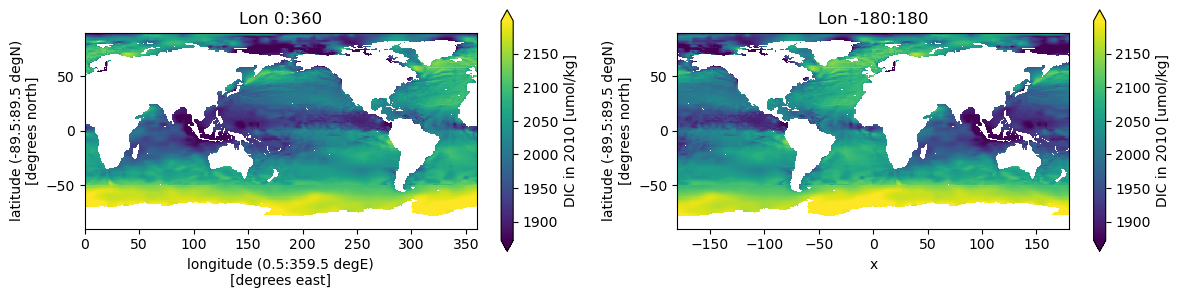

In [6]:
f, axa = plt.subplots(1,2, figsize=(12,3))

ds['dic_2010'].plot.imshow(ax=axa[0], robust=True)
axa[0].set_title('Lon 0:360')

ds_180['dic_2010'].plot.imshow(ax=axa[1], robust=True)
axa[1].set_title('Lon -180:180')

for ax in axa:
    ax.set_aspect('equal')

f.tight_layout()

f.savefig('qa_test_lon_180.png', dpi=300)

**Step 3: Calculate zonal and meridional mean, stdev, and confidence intervals**

In [48]:
# zonal mean at each longitude 0:360 degE
dTA_alkstar_zonal_mean_180 = ds_180['dTA_alkstar_NaOH_CDReff80'].mean(dim=('y'))
dTA_co3_zonal_mean_180 = ds_180['dTA_co3_NaOH_CDReff80'].mean(dim=('y'))
dTA_omara_zonal_mean_180 = ds_180['dTA_omara_NaOH_CDReff80'].mean(dim=('y'))
dTA_phtot_zonal_mean_180 = ds_180['dTA_phtot_NaOH_CDReff80'].mean(dim=('y'))

# meridional mean at each latitude -90:90 degN
dTA_alkstar_meridional_mean = ds_180['dTA_alkstar_NaOH_CDReff80'].mean(dim=('x'))
dTA_co3_meridional_mean = ds_180['dTA_co3_NaOH_CDReff80'].mean(dim=('x'))
dTA_omara_meridional_mean = ds_180['dTA_omara_NaOH_CDReff80'].mean(dim=('x'))
dTA_phtot_meridional_mean = ds_180['dTA_phtot_NaOH_CDReff80'].mean(dim=('x'))

# zonal std at each longitude 0:360 degE
dTA_alkstar_zonal_std_180 = ds_180['dTA_alkstar_NaOH_CDReff80'].std(dim=('y'))
dTA_co3_zonal_std_180 = ds_180['dTA_co3_NaOH_CDReff80'].std(dim=('y'))
dTA_omara_zonal_std_180 = ds_180['dTA_omara_NaOH_CDReff80'].std(dim=('y'))
dTA_phtot_zonal_std_180 = ds_180['dTA_phtot_NaOH_CDReff80'].std(dim=('y'))

# meridional std at each latitude -90:90 degN
dTA_alkstar_meridional_std = ds_180['dTA_alkstar_NaOH_CDReff80'].std(dim=('x'))
dTA_co3_meridional_std = ds_180['dTA_co3_NaOH_CDReff80'].std(dim=('x'))
dTA_omara_meridional_std = ds_180['dTA_omara_NaOH_CDReff80'].std(dim=('x'))
dTA_phtot_meridional_std = ds_180['dTA_phtot_NaOH_CDReff80'].std(dim=('x'))

# zonal upr ci at each longitude 0:360 degE
zonal_upr_alkstar = dTA_alkstar_zonal_mean_180 + 1 * dTA_alkstar_zonal_std_180
zonal_upr_co3 = dTA_co3_zonal_mean_180 + 1 * dTA_alkstar_zonal_std_180
zonal_upr_omara = dTA_omara_zonal_mean_180 + 1 * dTA_alkstar_zonal_std_180
zonal_upr_phtot = dTA_phtot_zonal_mean_180 + 1 * dTA_alkstar_zonal_std_180

# meridional upr ci at each longitude 0:360 degE
merid_upr_alkstar = dTA_alkstar_meridional_mean + 1 * dTA_alkstar_meridional_std
merid_upr_co3 = dTA_co3_meridional_mean + 1 * dTA_alkstar_meridional_std
merid_upr_omara = dTA_omara_meridional_mean + 1 * dTA_alkstar_meridional_std
merid_upr_phtot = dTA_phtot_meridional_mean + 1 * dTA_alkstar_meridional_std

# zonal lower ci at each longitude 0:360 degE
zonal_lwr_alkstar = dTA_alkstar_zonal_mean_180 - 1 * dTA_alkstar_zonal_std_180
zonal_lwr_co3 = dTA_co3_zonal_mean_180 - 1 * dTA_alkstar_zonal_std_180
zonal_lwr_omara = dTA_omara_zonal_mean_180 - 1 * dTA_alkstar_zonal_std_180
zonal_lwr_phtot = dTA_phtot_zonal_mean_180 - 1 * dTA_alkstar_zonal_std_180

# meridional lwr ci at each longitude 0:360 degE
merid_lwr_alkstar = dTA_alkstar_meridional_mean - 1 * dTA_alkstar_meridional_std
merid_lwr_co3 = dTA_co3_meridional_mean - 1 * dTA_alkstar_meridional_std
merid_lwr_omara = dTA_omara_meridional_mean - 1 * dTA_alkstar_meridional_std
merid_lwr_phtot = dTA_phtot_meridional_mean - 1 * dTA_alkstar_meridional_std


**Step 4: Make the plot**

The next section plots the mean +/- stdev intervals of transects of the meridional and zonal amounts ΔTA needed to restore pH to pre-industrial conditions for TA-DIC, CO3--, pH, and Ωara. 

A larger amount of ΔTA is needed to restore pH to pre-industrial conditions compared with the OA indicators. This is because the total anthropogenic reduction in pH has been caused not only by anthropogenic CO2 emissions, but also by increase in temperature. The other OA indicators are not as strongly influenced by temperature, therefore a larger amount of ΔTA is needed to compensate for the relatively strong effect of temperature on pH. 

The meridonal means show significant differences at different latitudes, with the highest values in the northern and southern temperate climate zones, and local minima near the equator and in the polar regions.

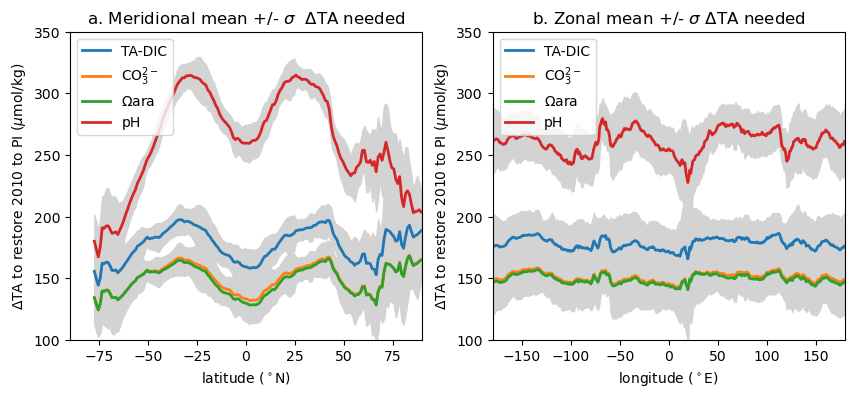

In [49]:
f, axa = plt.subplots(1,2, figsize=(10,4))

lat = np.linspace(-89.5,89.5,180)
lon = np.linspace(0.5,359.5,360)
lon_180 = np.linspace(-179.5,179.5,360)

# axa[0]
axa[0].plot(lat, dTA_alkstar_meridional_mean, label='TA-DIC', linestyle='-', marker='', linewidth=2)
axa[0].plot(lat, dTA_co3_meridional_mean, label='CO$_3^{2-}$', linestyle='-', marker='', linewidth=2)
axa[0].plot(lat, dTA_omara_meridional_mean, label=r'$\Omega$ara', linestyle='-', marker='', linewidth=2)
axa[0].plot(lat, dTA_phtot_meridional_mean, label='pH', linestyle='-', marker='', linewidth=2)
axa[0].set_ylabel(r'$\Delta$TA to restore 2010 to PI ($\mu$mol/kg)')
axa[0].legend(loc='upper left')
axa[0].set_title(r'a. Meridional mean +/- $\sigma$  $\Delta$TA needed')
axa[0].set_xlim(-90,90)
axa[0].set_ylim(100,350)
axa[0].set_xlabel(r"latitude ($^\circ$N)")
# confidence limits
axa[0].fill_between(lat, merid_lwr_phtot, merid_upr_phtot,color="#d3d3d3")
axa[0].fill_between(lat, merid_lwr_omara, merid_upr_omara,color="#d3d3d3")
axa[0].fill_between(lat, merid_lwr_co3, merid_upr_co3,color="#d3d3d3")
axa[0].fill_between(lat, merid_lwr_alkstar, merid_upr_alkstar,color="#d3d3d3")

# axa[1]
axa[1].plot(lon_180, dTA_alkstar_zonal_mean_180, label='TA-DIC', linestyle='-', marker='', linewidth=2)
axa[1].plot(lon_180, dTA_co3_zonal_mean_180, label='CO$_3^{2-}$', linestyle='-', marker='', linewidth=2)
axa[1].plot(lon_180, dTA_omara_zonal_mean_180, label=r'$\Omega$ara', linestyle='-', marker='', linewidth=2)
axa[1].plot(lon_180, dTA_phtot_zonal_mean_180, label='pH', linestyle='-', marker='', linewidth=2)
axa[1].set_ylabel(r'$\Delta$TA to restore 2010 to PI ($\mu$mol/kg)')
axa[1].legend(loc='upper left')
axa[1].set_title(r'b. Zonal mean +/- $\sigma$ $\Delta$TA needed')
axa[1].set_xlim(-180,180);
axa[1].set_ylim(100,350)
axa[1].set_xlabel(r"longitude ($^\circ$E)");
# confidence limits
axa[1].fill_between(lon_180, zonal_lwr_phtot, zonal_upr_phtot,color="#d3d3d3")
axa[1].fill_between(lon_180, zonal_lwr_omara, zonal_upr_omara,color="#d3d3d3")
axa[1].fill_between(lon_180, zonal_lwr_co3,zonal_upr_co3,color="#d3d3d3")
axa[1].fill_between(lon_180, zonal_lwr_alkstar, zonal_upr_alkstar,color="#d3d3d3")

f.savefig('meridional_and_zonal_averages_of_dTA_root.png', dpi=300)

#### *Reproject to the Mollweide projection using rioxarray*

Next we will reproject the dataset to the equal area Mollweide projection. This will allow us to use the reprojected data to calcualte spatial statistics that are normalized for area.

**Step 1: Define the original projection of ds**

In [9]:
import rioxarray
#Set CRS of the original xarray Datasets
ds_180.rio.write_crs('EPSG:4326', inplace=True);
print(ds_180.spatial_ref)

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...


**Step 2: Reproject to Mollweide and store reprojected dataset as ds_moll**

In [10]:
#Mollweide
ea_proj = '+proj=moll'

#Reproject and store output
# clim_da = clim_ds['t2m'].rio.reproject(ea_proj)
# dTA_alkstar_ea = ds2['dTA_alkstar_NaOH_CDReff80'].rio.reproject(ea_proj)
ds_moll = ds_180.rio.reproject(ea_proj)
ds_moll

<xarray.Dataset> Size: 27MB
Dimensions:                    (x: 805, y: 402)
Coordinates:
  * x                          (x) float64 6kB -1.802e+07 ... 1.801e+07
  * y                          (y) float64 3kB 8.998e+06 ... -8.976e+06
    spatial_ref                int64 8B 0
Data variables: (12/16)
    talk_1750                  (y, x) float32 1MB nan nan nan ... nan nan nan
    dic_1750                   (y, x) float32 1MB nan nan nan ... nan nan nan
    temp_1750                  (y, x) float32 1MB nan nan nan ... nan nan nan
    sal_1750                   (y, x) float32 1MB nan nan nan ... nan nan nan
    talk_2010                  (y, x) float32 1MB nan nan nan ... nan nan nan
    dic_2010                   (y, x) float32 1MB nan nan nan ... nan nan nan
    ...                         ...
    dist2coast                 (y, x) float32 1MB nan nan nan ... nan nan nan
    LME                        (y, x) float64 3MB nan nan nan ... nan nan nan
    dTA_alkstar_NaOH_CDReff80  (y, x) float64 3MB nan nan nan ... nan nan nan
    dTA_co3_NaOH_CDReff80      (y, x) float64 3MB nan nan nan ... nan nan nan
    dTA_omara_NaOH_CDReff80    (y, x) float64 3MB nan nan nan ... nan nan nan
    dTA_phtot_NaOH_CDReff80    (y, x) float64 3MB nan nan nan ... nan nan nan
Attributes:
    title:    Average carbonate system variables of the surface ocean in the ...
    source:   TA, DIC, temperature and salinity from Jiang et al 2023, sio3 a...
    author:   Greg Pelletier 14-Mar-2025

**Step 3: QA check to show the original (shifted to 180:180) and reprojected maps using the concentration of DIC in the year 2010 as an example to make sure it looks ok**

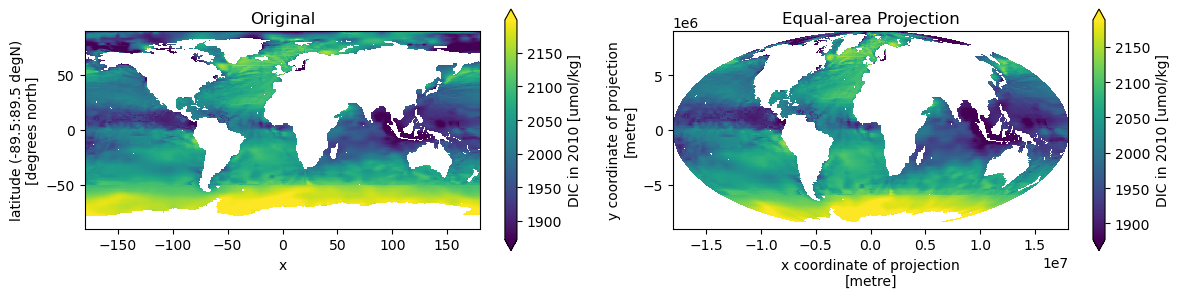

In [11]:
f, axa = plt.subplots(1,2, figsize=(12,3))

ds_180['dic_2010'].plot.imshow(ax=axa[0], robust=True)
axa[0].set_title('Original')

ds_moll['dic_2010'].plot.imshow(ax=axa[1], robust=True)
axa[1].set_title('Equal-area Projection')

for ax in axa:
    ax.set_aspect('equal')

f.tight_layout()

f.savefig('qa_test_mollweide_reproject.png', dpi=300)

#### *Calculate area-weighted mean and standard deviations of the ΔTA needed to restore OA indicators to pre-industrial conditions in global climate and coastal zones*

Next we will use the reprojected dataset in the Mollweide projection to calculate spatial statistics that are normalized for area.

The previous plot of the meridional means of the ΔTA needed to restore OA indicators to pre-industrial conditions show signficant differences between major global climate zones. Next we will calculate the area-weighted means and standard deviations for the following climate zones, and also in the coastal zone that is within 300km of the nearest coast, as well as globally across all grid cells: 

- arctic (latitude >= 66.5N)
- north temperate (latitude < 66.5N and >= 23.5N)
- tropical (latitude < 23.5N and < 23.5S)
- south temperate (latitude < 66.5S and >= 23.5S)
- arctic (latitude >= 66.5S)
- coastal (within 300km of the nearest coast)
- global 

**Step 1: Specify the indexes for each climate zone region for the summary statistics**

In [12]:
polar_lat = 66.5    # deg N and S
tropical_lat = 23.5 # deg N and S

#Compute y coordinate of polar circle latitude
from pyproj import CRS, Transformer
transformer = Transformer.from_crs(CRS.from_epsg(4326), CRS.from_proj4(ea_proj))
polar_y = transformer.transform(polar_lat, 0)[-1]
tropical_y = transformer.transform(tropical_lat, 0)[-1]
print("polar_y= ",polar_y)
print("tropical_y= ",tropical_y)

polar_y=  7474236.788842151
tropical_y=  2874281.610866913


**Step 2: Calculate the index values for each climate zone**

In [13]:
# compute the index values that are in each climate zone
arctic_idx = (ds_moll['y'] >= polar_y)
antarctic_idx = (ds_moll['y'] <= -polar_y)
tropical_idx = (ds_moll['y'] < tropical_y) & (ds_moll['y'] > -tropical_y)
north_temperate_idx = (ds_moll['y'] >=tropical_y) & (ds_moll['y'] < polar_y)
south_temperate_idx = (ds_moll['y'] <=-tropical_y) & (ds_moll['y'] > -polar_y)

**Step 3: QA test plot using DIC in 2010 to check and see if the zones look correct**

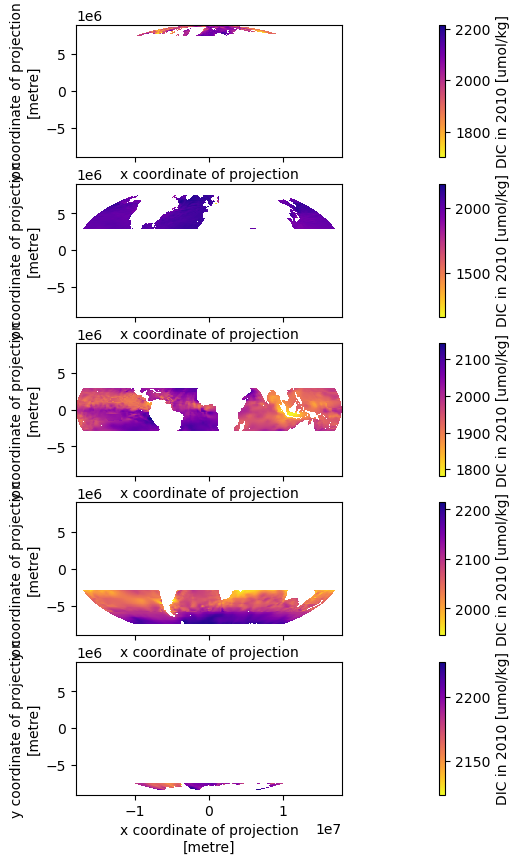

In [14]:
# make a QA test plot using DIC in 2010 to check and see if the zones look correct

f, axa = plt.subplots(5,1, figsize=(25,10), sharex=True)

kwargs = dict(cmap='plasma_r')
ds_moll['dic_2010'].where(arctic_idx).plot(ax=axa[0], **kwargs);
ds_moll['dic_2010'].where(north_temperate_idx).plot(ax=axa[1], **kwargs);
ds_moll['dic_2010'].where(tropical_idx).plot(ax=axa[2], **kwargs);
ds_moll['dic_2010'].where(south_temperate_idx).plot(ax=axa[3], **kwargs);
ds_moll['dic_2010'].where(antarctic_idx).plot(ax=axa[4], **kwargs);

for ax in axa:
    ax.set_aspect('equal')
    ax.set_title('')

f.savefig('qa_test_climate_zone_idx.png')

**Step 4: Find the grid cell indices of grid cells that are within 300km of the nearest coast**

The data source for the array of values of distance to the nearest coast are included in the Jiang_data_forPyOAE.nc file, and are originoally from NASA from the following link:

https://oceancolor.gsfc.nasa.gov/resources/docs/distfromcoast/

In [15]:
coastal_idx = ds_moll.dist2coast.values<300

**Step 5: QA plot of equal-area projection of coastal grid cells using 2010 DIC as an example**

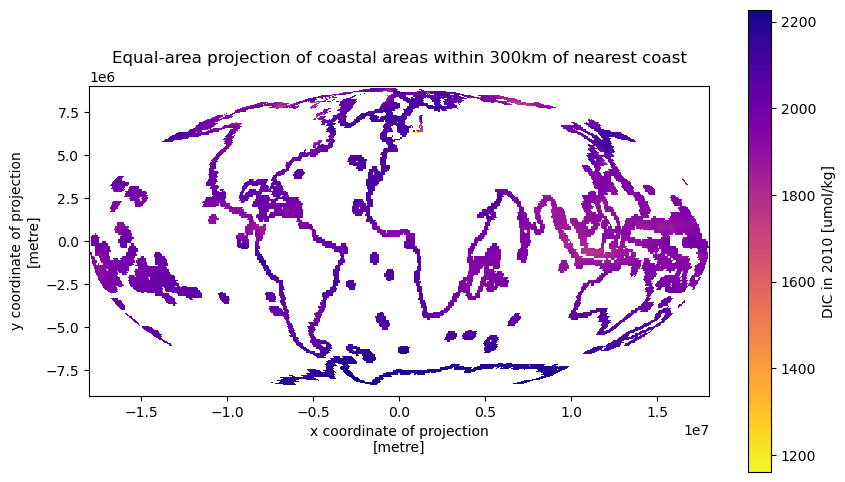

In [16]:
# make a QA test plot using DIC in 2010 to check and see if the zones look correct

f, axa = plt.subplots(figsize=(10,6), sharex=True)

kwargs = dict(cmap='plasma_r')
ds_moll['dic_2010'].where(coastal_idx).plot(ax=axa, **kwargs);

axa.set_aspect('equal')
axa.set_title('Equal-area projection of coastal areas within 300km of nearest coast')

f.savefig('qa_test_coastal_idx.png')

**Step 6: Calculate and show tables of the means and standard deviations of ΔTA needed for each OA indicator in each zone**

In [77]:
# Mean values of dTA_root for each OA indicator in each zone 

import pandas as pd

climate_zone_mean = {
    'TA-DIC': [ds_moll['dTA_alkstar_NaOH_CDReff80'].where(arctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(north_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(tropical_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(south_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(antarctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(coastal_idx).mean(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].mean(dim=('x', 'y')).values],
    'CO3--': [ds_moll['dTA_co3_NaOH_CDReff80'].where(arctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(north_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(tropical_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(south_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(antarctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(coastal_idx).mean(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].mean(dim=('x', 'y')).values],
    'Omega_aragonite': [ds_moll['dTA_omara_NaOH_CDReff80'].where(arctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(north_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(tropical_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(south_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(antarctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(coastal_idx).mean(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].mean(dim=('x', 'y')).values],
    'pH': [ds_moll['dTA_phtot_NaOH_CDReff80'].where(arctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(north_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(tropical_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(south_temperate_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(antarctic_idx, drop=True).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(coastal_idx).mean(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].mean(dim=('x', 'y')).values]
}
data_mean = pd.DataFrame.from_dict(climate_zone_mean)
new_column_data = ['Arctic', 'North Temperate', 'Tropical', 'South Temperate', 'Antarctic', 'Coastal', 'Global']   # new column of labels
data_mean.insert(0, 'Zone', new_column_data)   # insert column of labels as first col
print('Mean amount of dTA needed to restore OA indicators to pre-industrial (umol/kg)')
# Apply left justification to column headers
data_mean = data_mean.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', '')]}]
)
data_mean

Mean amount of dTA needed to restore OA indicators to pre-industrial (umol/kg)


,Zone,TA-DIC,CO3--,Omega_aragonite,pH
0,Arctic,183.35571177451982,158.23439079820326,157.92850950699636,232.8200787439924
1,North Temperate,184.12917794574437,155.29553120994845,153.78952150979694,285.82475613742315
2,Tropical,171.1540482863694,142.94551315684538,139.49650266591556,281.7157687762671
3,South Temperate,184.3330229280001,156.2404242973717,155.09064856332074,269.57262878926105
4,Antarctic,157.92395624384093,135.89687801308068,135.77574968158274,187.24479804433057
5,Coastal,173.89346928451096,146.2231687485205,143.7136030806629,271.31482566140187
6,Global,178.08609351775954,150.04046342713133,147.8949354968349,274.6281309629667


In [79]:
# Standard deviations of dTA_root for each OA indicator in each zone

import pandas as pd

climate_zone_std = {
    'TA-DIC': [ds_moll['dTA_alkstar_NaOH_CDReff80'].where(arctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(north_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(tropical_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(south_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(antarctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].where(coastal_idx).std(dim=('x', 'y')).values,
                ds_moll['dTA_alkstar_NaOH_CDReff80'].std(dim=('x', 'y')).values],
    'CO3--': [ds_moll['dTA_co3_NaOH_CDReff80'].where(arctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(north_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(tropical_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(south_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(antarctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].where(coastal_idx).std(dim=('x', 'y')).values,
                ds_moll['dTA_co3_NaOH_CDReff80'].std(dim=('x', 'y')).values],
    'Omega_aragonite': [ds_moll['dTA_omara_NaOH_CDReff80'].where(arctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(north_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(tropical_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(south_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(antarctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].where(coastal_idx).std(dim=('x', 'y')).values,
                ds_moll['dTA_omara_NaOH_CDReff80'].std(dim=('x', 'y')).values],
    'pH': [ds_moll['dTA_phtot_NaOH_CDReff80'].where(arctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(north_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(tropical_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(south_temperate_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(antarctic_idx, drop=True).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].where(coastal_idx).std(dim=('x', 'y')).values,
                ds_moll['dTA_phtot_NaOH_CDReff80'].std(dim=('x', 'y')).values]
}
data_std = pd.DataFrame.from_dict(climate_zone_std)
new_column_data = ['Arctic', 'North Temperate', 'Tropical', 'South Temperate', 'Antarctic', 'Coastal', 'Global']   # new column of labels
data_std.insert(0, 'OA indicator', new_column_data)   # insert column of labels as first col
print('Standard deviation of amount of dTA needed to restore OA indicators to pre-industrial (umol/kg)')
data_std = data_std.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)
data_std

Standard deviation of amount of dTA needed to restore OA indicators to pre-industrial (umol/kg)


,OA indicator,TA-DIC,CO3--,Omega_aragonite,pH
0,Arctic,31.77629560591998,27.743998642264412,27.705003936020706,50.03424366216796
1,North Temperate,18.312791724645667,15.380455159222592,15.08862722589125,39.69265549116849
2,Tropical,16.985018900551843,14.093372972703671,14.162477773098455,32.93700182448317
3,South Temperate,17.22908536011735,14.10132138360967,13.655949327390513,44.71400667440657
4,Antarctic,28.460501093192903,24.46131596435951,24.454321173101278,35.499236458392865
5,Coastal,21.460558588875255,18.35051055557384,18.61929911330198,43.67945291502026
6,Global,19.582590330756773,16.678368685392265,16.96008837668201,42.460081638480425
